## 1. Function for rendering sphere

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import cos
import time

In [2]:
# path for ffmpeg
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

In [3]:
def render_sphere(r, I, albedo=1):
    x, y = np.meshgrid(np.linspace(-r, r, 2*r), np.linspace(-r, r, 2*r))
    
    # partial derivative for x and y
    p = -x / np.sqrt(r**2 - (x**2 + y**2))
    q = -y / np.sqrt(r**2 - (x**2 + y**2))
    
    # calculate image brightness
    R = (albedo * (-I[0]*p - I[1]*q + I[2])) / np.sqrt(1 + p**2 + q**2)
    
    # mask out
    mask = ((r**2 - (x**2 + y**2) >= 0));
    R = R * mask
    E = np.maximum(R, np.zeros_like(R))
    E[np.isnan(E)] = 0
    
    # normalize
    E = E / np.max(E)
    
    return E

## 2. Rendering sphere

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


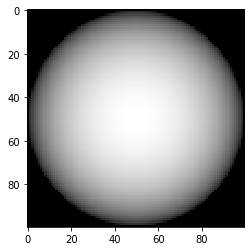

In [4]:
im = plt.imshow(render_sphere(50, [0, 0, 0.98]), cmap='gray', animated=True)

## 3. Rendering animation

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


<IPython.core.display.Javascript object>


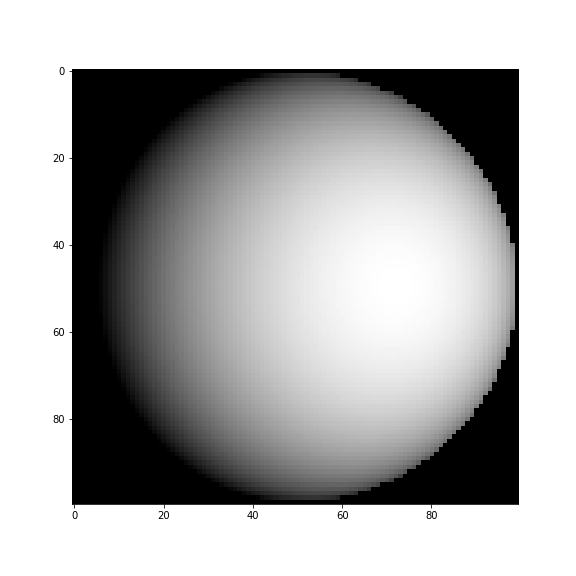

......Done!


In [5]:
# we need `notebook` for the anim to render in the notebook.
%matplotlib notebook
%matplotlib notebook

import matplotlib.animation as animation

# frame per seconds
fps = 30

# animation length
nSeconds = 5

# calculate frames
snapshots = [ render_sphere(50, [i*0.01, 0, 0.98]) for i in range( nSeconds * fps ) ]

# Set up the figure
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

# define animation function
def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    im.set_cmap('gray')
    return [im]

# Create animation
anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

# Save animation
anim.save('animation.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')